In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno
from sklearn.impute import SimpleImputer


##Load Train Data

In [2]:
train_df = pd.read_csv("data/train.csv", index_col="PassengerId")
train_shape = train_df.shape
display(train_df.head())
print(f"Entries: {train_shape[0]}\nFeatures: {train_shape[1]}")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Entries: 891
Features: 11


##DATA PREPROCESSING

In [3]:
# initial dtypes of each column
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


We observe that cabin is mostly made up of nulls. We also see from the preview of the data that while it is classed as object, it is actually string type, which cannot be categorized and does not contribute much to the outcome. Thus, this column should not be used for analyses.

We also notice that Age has a significant number of nulls.

In [4]:
train_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

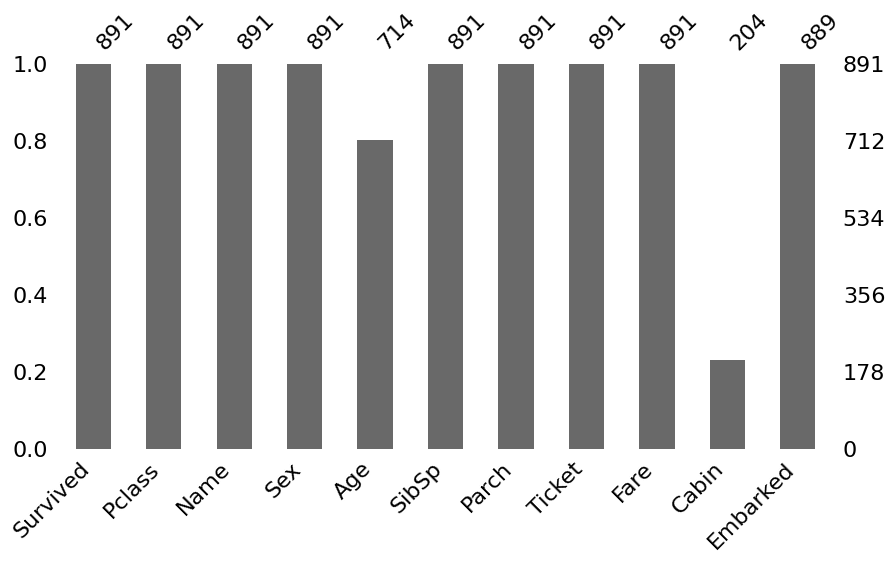

In [5]:
#  null entries
msno.bar(train_df, figsize=(10,5))

<Axes: >

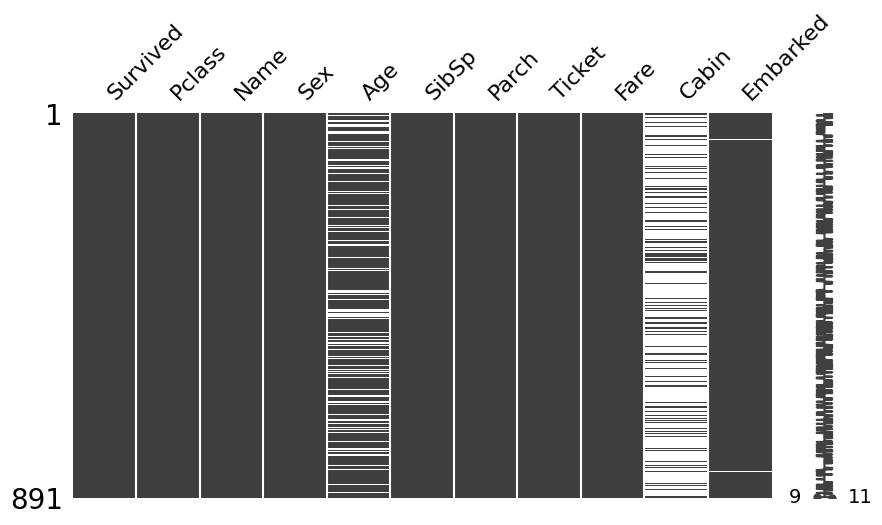

In [6]:
msno.matrix(train_df, figsize=(10,5))

In [7]:
# no. of unique values in each column
train_df.nunique()

Survived      2
Pclass        3
Name        891
Sex           2
Age          88
SibSp         7
Parch         7
Ticket      681
Fare        248
Cabin       147
Embarked      3
dtype: int64

In [8]:
#  check if there are duplicated passengers
count_duplicated_passengers = train_df.Name.duplicated().sum()
print(f"There are {count_duplicated_passengers} duplicated passengers in this log.")

There are 0 duplicated passengers in this log.


What needs to be done:
1. reformat column names -> lowercase 
2. deal with entries/features with null values: impute or drop

In [9]:
#  reformat column names
train_df.columns = train_df.columns.str.lower()
train_df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Embarked was imputed using the mode as there were only 3 missing values and it is most likely that it would follow the values of the most frequent S.

In [10]:
#  check entries with null Embarked values
null_embarked = train_df.embarked.isna()
display(train_df[null_embarked].head())
print(f"There are {null_embarked.sum()} passengers with no embarked specified.")
print(f"That is {(null_embarked.sum() / train_df.shape[0]) * 100:.2f}% of the entire train_df with no specified embarked")

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


There are 2 passengers with no embarked specified.
That is 0.22% of the entire train_df with no specified embarked


In [11]:
#  impute null embarked values with mode values
def embarked_solution(df):
    df['embarked'] = df['embarked'].fillna(df['embarked'].mode()[0])
    return df

train_df = embarked_solution(train_df)
train_df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


Now looking at Age

In [12]:
#  check entries with null Age values
null_age = train_df.age.isna()
display(train_df[null_age].head())
print(f"There are {null_age.sum()} passengers with no age specified.")
print(f"That is {(null_age.sum() / train_df.shape[0]) * 100:.2f}% of the entire train_df with no specified age")

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


There are 177 passengers with no age specified.
That is 19.87% of the entire train_df with no specified age


<Axes: title={'center': 'Age'}, ylabel='Frequency'>

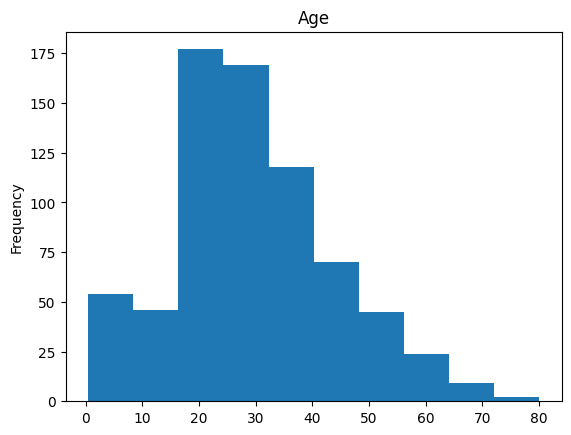

In [13]:
#  looking at distribution of age 
train_df.age.plot.hist(title="Age")

In [14]:
#  checking possible titles
train_df['title'] = train_df['name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

# making Miss into Ms
train_df['title'] = train_df['title'].replace('Miss','Ms')

train_df['title'].unique()

array(['Mr', 'Mrs', 'Ms', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Major',
       'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer'],
      dtype=object)

In [15]:
train_df.groupby(['pclass','sex','title'])[["age"]].median()

age
pclass sex    title             
1      female Dr            49.0
              Lady          48.0
              Mlle          24.0
              Mme           24.0
              Mrs           41.5
              Ms            30.0
              the Countess  33.0
       male   Capt          70.0
              Col           58.0
              Don           40.0
              Dr            44.0
              Jonkheer      38.0
              Major         48.5
              Master         4.0
              Mr            40.0
              Sir           49.0
2      female Mrs           32.0
              Ms            24.0
       male   Dr            38.5
              Master         1.0
              Mr            31.0
              Rev           46.5
3      female Mrs           31.0
              Ms            18.0
       male   Master         4.0
              Mr            26.0

In [25]:
#  impute with reference to title (Mr., Ms., Mrs.), passenger class, and sex
def age_solution(df):
    grouped_age_df = df[["pclass", "sex", "title", "age"]].copy()
    df["age"] = grouped_age_df.groupby(['pclass','sex','title'])["age"].transform(lambda x: x.fillna(x.median()))
    return df

train_df = age_solution(train_df)
train_df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Ms
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,NaN,S,Ms


Imputation for age was done by using the median (due to the skewed nature of the plot) and with reference to title and passenger class.

The title and passenger class were used as reference as these can be used as a general guide for the age of a person. For instance, especially considering the time period, it is more likely for someone with a title "Mrs" to be older than someone with a title "Ms". Passenger class was also used as those who are older are more likely to make more money. However, young companions or family members may also be the same passenger class. As such, the titles provide more information on the passenger and their age. Sex was also used for further classification.

Looking at Cabin Column

In [26]:
#  check entries with null Cabin values
null_cabin = train_df.cabin.isna()
display(train_df[null_cabin].head())
print(f"There are {null_cabin.sum()} passengers with no cabin specified.")
print(f"That is {(null_cabin.sum() / train_df.shape[0]) * 100:.2f}% of the entire train_df with no specified cabin ID")

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,title
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Ms
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
6,0,3,"Moran, Mr. James",male,26.0,0,0,330877,8.4583,NaN,Q,Mr
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,Master


There are 687 passengers with no cabin specified.
That is 77.10% of the entire train_df with no specified cabin ID


In [27]:
#  drop cabin column
def cabin_solution(df):
    return df.drop(columns=["cabin"])

train_df = cabin_solution(train_df)
train_df

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,embarked,title
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Ms
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,Rev
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,Ms
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,S,Ms


<Axes: >

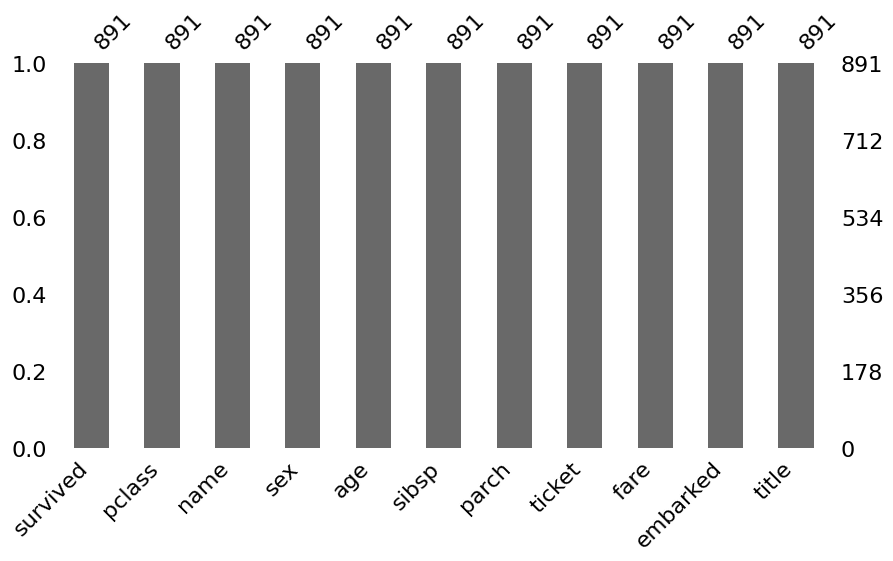

In [28]:
#  check if there are no more empty values
msno.bar(train_df, figsize=(10,5))

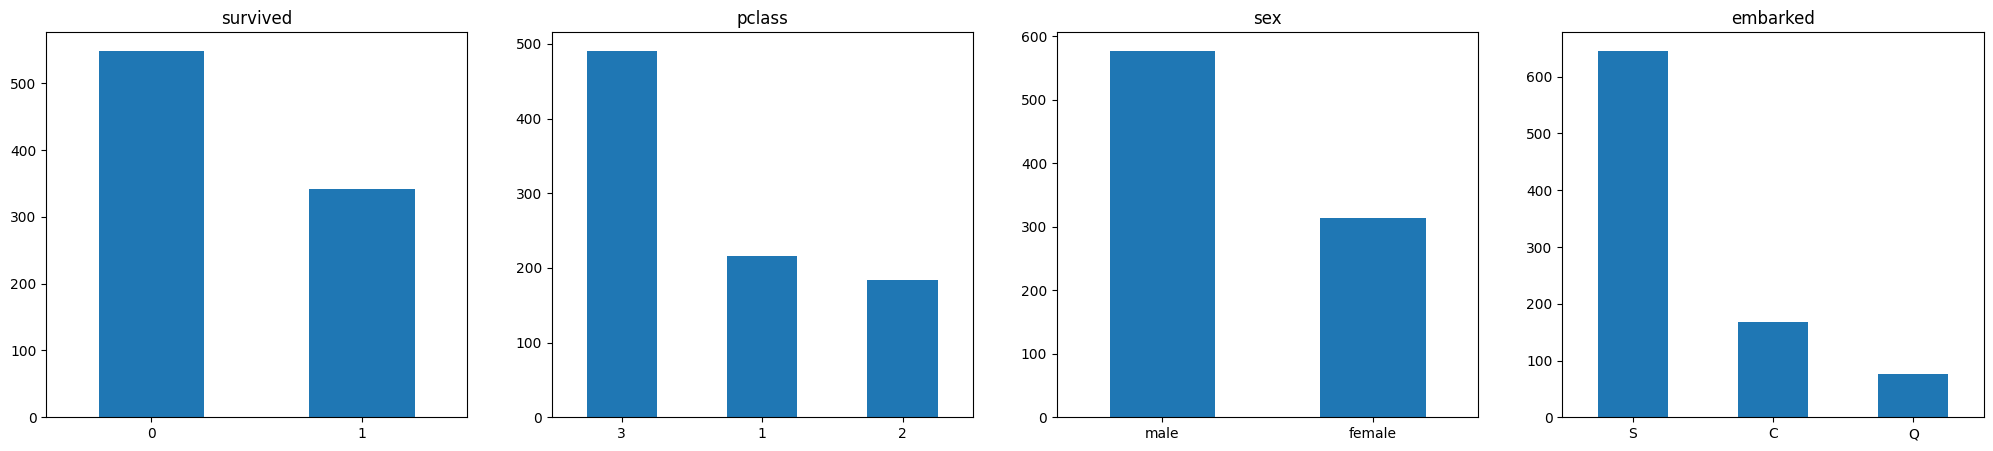

In [29]:
fig, axs = plt.subplots(1,4, figsize=(25,5))

bar_list = ["survived", 
            "pclass",
            "sex",
            "embarked",]

for i, col in enumerate(bar_list):
    train_df[col].value_counts().plot(kind="bar",
                       ax=axs[i],
                       rot=0)
    axs[i].set_title(col)

Survival rate of 1: 62.96%
Survival rate of 2: 47.28%
Survival rate of 3: 24.24%
Survival rate of female: 74.20%
Survival rate of male: 18.89%
Survival rate of C: 55.36%
Survival rate of Q: 38.96%
Survival rate of S: 33.90%


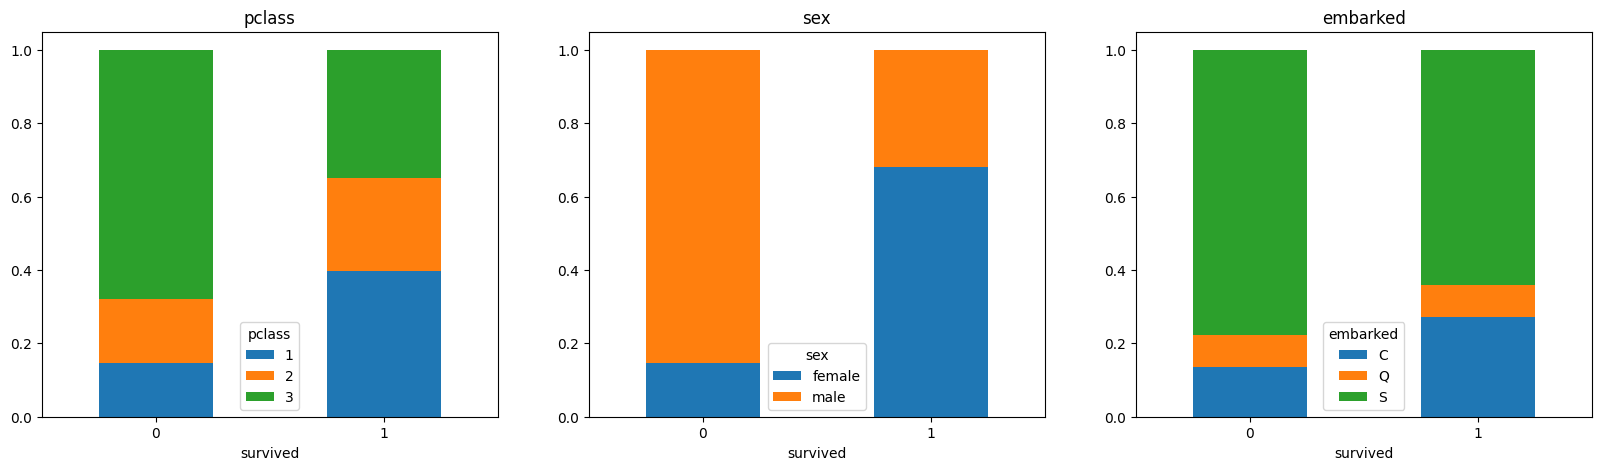

In [30]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

col_list = ["pclass",
            "sex",
            "embarked",]

for i, col in enumerate(col_list):
    pd.crosstab(train_df["survived"], train_df[col], normalize="index").plot.bar(stacked=True, ax=axs[i], rot=0)
    axs[i].set_title(col)
    
for col in col_list:
    survival_rates = pd.crosstab(train_df["survived"], train_df[col], normalize="columns").loc[1]
    for category in survival_rates.index:
        print(f"Survival rate of {category}: {survival_rates[category] * 100:.2f}%")
    

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data=train_df,
             x="age",
             ax=axs[0])
axs[0].set_title("Age")
axs[0].axvline(x=train_df.age.mean(),
               linewidth=3, 
               color='r',
               label="Mean"
               )
axs[0].axvline(x=train_df.age.median(),
               linewidth=3, 
               color='g',
               label="Median"
               )
axs[0].legend()

sns.boxplot(data=train_df,
            x="fare",
            ax=axs[1])
axs[1].set_title("Fare")

print(f"Mean Age: {train_df.age.mean():.2f}")
print(f"Median Age: {train_df.age.median()}\n")
print(f"Mean Fare: {train_df.fare.mean():.2f}")
print(f"Median Fare: {train_df.fare.median():.2f}")

In [ ]:
survivors = train_df.query("survived == 1")
victims = train_df.query("survived == 0")

fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data=survivors,
             x="age",
             hue="sex",
             ax=axs[0],
             hue_order=["male", "female"]
             )
axs[0].set_title("Survivors")

sns.histplot(data=victims,
             x="age",
             hue="sex",
             ax=axs[1],
             hue_order=["male", "female"]
             )
axs[1].set_title("Victims")

sex_numerical = pd.crosstab(train_df.survived, train_df.sex, train_df.age, aggfunc=[np.mean, min, max])
display(sex_numerical)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(15,5))

sns.histplot(data=survivors,
             x="age",
             hue="pclass",
             ax=axs[0],
             hue_order=["male", "female"]
             )
axs[0].set_title("Survivors")

sns.histplot(data=victims,
             x="age",
             hue="pclass",
             ax=axs[1],
             hue_order=["male", "female"]
             )
axs[1].set_title("Victims")

pclass_numerical = pd.crosstab(train_df.survived, train_df.pclass, train_df.age, aggfunc=[np.mean, min, max])
display(pclass_numerical)

In [ ]:
train_df['sex'] = train_df['sex'].replace(['female','male'],[0,1])
train_df

In [ ]:
#  one hot encoding for embarked features
train_df = pd.get_dummies(data=train_df, columns=["embarked"])
train_df

In [ ]:
#  companion count column
train_df["companions"] = train_df.sibsp + train_df.parch
train_df = train_df.drop(columns=["sibsp", "parch"])
train_df.sort_values("companions")

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(14,8))

train_df.companions.value_counts().plot.bar(ax=axs[0], rot=0,title="Companions")
pd.crosstab(train_df.survived, train_df.companions, normalize="index").plot.bar(stacked=True, ax=axs[1],rot=0,title="Companions")

survivor_companions = pd.crosstab(train_df.survived, train_df.companions, normalize="columns").loc[1] * 100

for idx in survivor_companions.index:
    print(f"Survival rate for passengers with {idx} companions: {survivor_companions[idx]:.2f}%")

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(7,7))

sns.boxplot(data=train_df,
            x="survived", y="fare")
axs.set_title("Fare of Survivors vs. Victims")
plt.show()

print(f"Survivors Mean Fare: {train_df.query('survived==1')['fare'].mean():.2f}")
print(f"Survivors Median Fare: {train_df.query('survived==1')['fare'].median():.2f}")
print(f"Victims Mean Fare: {train_df.query('survived==0')['fare'].mean():.2f}")
print(f"Victims Median Fare: {train_df.query('survived==0')['fare'].median():.2f}")

In [ ]:
fig, axs = plt.subplots(1,1, figsize=(7,7))

sns.boxplot(data=train_df,
            x="pclass", y="fare")
axs.set_title("Fare of each passenger class")
plt.show()

print(f"pclass 1 Mean & Median Fare: {train_df.query('pclass==1')['fare'].mean():.2f} | {train_df.query('pclass==1')['fare'].median():.2f}")
print(f"pclass 2 Mean & Median Fare: {train_df.query('pclass==2')['fare'].mean():.2f} | {train_df.query('pclass==2')['fare'].median():.2f}")
print(f"pclass 3 Mean & Median Fare: {train_df.query('pclass==3')['fare'].mean():.2f} | {train_df.query('pclass==3')['fare'].median():.2f}")